In [167]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
print("Setup Complete")

Setup Complete


In [168]:
# Path of the file to read
fifa_filepath = "data.csv"

# Read the file into a variable iris_data
data = pd.read_csv(fifa_filepath)

# Print the first 5 rows of the data
data.head()

y = data.Position
print(y.nunique())


27


In [169]:
y.describe()

count     18147
unique       27
top          ST
freq       2152
Name: Position, dtype: object

In [170]:
data = data.iloc[: ,28:-2]
data.head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,...,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0


In [171]:
#Verificando valores ausentes
data.isnull().sum()

LS                 2085
ST                 2085
RS                 2085
LW                 2085
LF                 2085
CF                 2085
RF                 2085
RW                 2085
LAM                2085
CAM                2085
RAM                2085
LM                 2085
LCM                2085
CM                 2085
RCM                2085
RM                 2085
LWB                2085
LDM                2085
CDM                2085
RDM                2085
RWB                2085
LB                 2085
LCB                2085
CB                 2085
RCB                2085
RB                 2085
Crossing             48
Finishing            48
HeadingAccuracy      48
ShortPassing         48
Volleys              48
Dribbling            48
Curve                48
FKAccuracy           48
LongPassing          48
BallControl          48
Acceleration         48
SprintSpeed          48
Agility              48
Reactions            48
Balance              48
ShotPower       

In [172]:
data.describe()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,...,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898
std,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,...,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669
min,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,...,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000
25%,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,...,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000
50%,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,...,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000
75%,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,...,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000
max,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,...,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 59 columns):
LS                 16122 non-null object
ST                 16122 non-null object
RS                 16122 non-null object
LW                 16122 non-null object
LF                 16122 non-null object
CF                 16122 non-null object
RF                 16122 non-null object
RW                 16122 non-null object
LAM                16122 non-null object
CAM                16122 non-null object
RAM                16122 non-null object
LM                 16122 non-null object
LCM                16122 non-null object
CM                 16122 non-null object
RCM                16122 non-null object
RM                 16122 non-null object
LWB                16122 non-null object
LDM                16122 non-null object
CDM                16122 non-null object
RDM                16122 non-null object
RWB                16122 non-null object
LB                 16122 non-n

In [174]:
def extract_value_from(Value):
    try:
        out = Value.split('+')[0]
        return float(out)
    except:
        return(Value)

In [175]:
Columns = data.iloc[:,:26].columns.to_list()
[data.update(data[Column_Name].apply(lambda x: extract_value_from(x)).astype("float64") )for Column_Name in Columns]
    

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [176]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(data.iloc[:].values)
Columns = data.iloc[:].columns.to_list()
data = pd.DataFrame(imp.transform(data.iloc[:].values),columns=Columns)


In [177]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 59 columns):
LS                 18207 non-null float64
ST                 18207 non-null float64
RS                 18207 non-null float64
LW                 18207 non-null float64
LF                 18207 non-null float64
CF                 18207 non-null float64
RF                 18207 non-null float64
RW                 18207 non-null float64
LAM                18207 non-null float64
CAM                18207 non-null float64
RAM                18207 non-null float64
LM                 18207 non-null float64
LCM                18207 non-null float64
CM                 18207 non-null float64
RCM                18207 non-null float64
RM                 18207 non-null float64
LWB                18207 non-null float64
LDM                18207 non-null float64
CDM                18207 non-null float64
RDM                18207 non-null float64
RWB                18207 non-null float64
LB       

In [178]:
#Verificando valores ausentes
data.isnull().sum()

LS                 0
ST                 0
RS                 0
LW                 0
LF                 0
CF                 0
RF                 0
RW                 0
LAM                0
CAM                0
RAM                0
LM                 0
LCM                0
CM                 0
RCM                0
RM                 0
LWB                0
LDM                0
CDM                0
RDM                0
RWB                0
LB                 0
LCB                0
CB                 0
RCB                0
RB                 0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions

In [179]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y.fillna('GK'))
list(le.classes_)


['CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'GK',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST']

In [195]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
lasso = linear_model.Lasso()
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, y, 
                                                    test_size=0.20, 
                                                    random_state=42 )
print(X_train.shape)
print(X_test.shape)

print(y_train)

#print(cross_val_score(lasso, x_train, y_train, cv=10))  

(14565, 59)
(3642, 59)
[ 1 18  1 ...  4  9  1]


In [184]:
import xgboost as xgb

In [185]:
# META CODE
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

clf = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=4))

clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          n_jobs=None)

In [186]:
from sklearn.metrics import accuracy_score
ypred = clf.predict(X_test)
accuracy_score(y_test, ypred)


0.5299286106534871

In [194]:
xg_train = xgb.DMatrix(X_train, label=y_train)
xg_test = xgb.DMatrix(X_test, label=y_test)


param = {'max_depth': 2, 'eta': 1, 'silent': 1, 'objective': 'multi:softprob','num_class':27}
param['nthread'] = 4
param['eval_metric'] = 'auc'
num_roud = 5
watchlist = [(xg_train, 'train'), (xg_test, 'eval')]

bst = xgb.train(param, xg_train, num_round, watchlist,feval=map5eval)
# get prediction
pred = bst.predict(xg_test)
error_rate = np.sum(pred != test_Y) / test_Y.shape[0]
print('Test error using softmax = {}'.format(error_rate))

NameError: name 'map5eval' is not defined

In [103]:
def defending(data):
    return int(round(data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [104]:
# renaming a column
data.rename(columns={'Club Logo':'Club_Logo'}, inplace=True)

# adding these categories to the data

data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)

KeyError: ("None of [Index(['Potential', 'Overall'], dtype='object')] are in the [index]", 'occurred at index 0')

In [ ]:
import requests
import random
from math import pi

import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)

def details(row, title, image, age, nationality, photo, logo, club):
    
    flag_image = "img_flag.jpg"
    player_image = "img_player.jpg"
    logo_image = "img_club_logo.jpg"
        
    img_flag = requests.get(image).content
    with open(flag_image, 'wb') as handler:
        handler.write(img_flag)
    
    player_img = requests.get(photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)
     
    logo_img = requests.get(logo).content
    with open(logo_image, 'wb') as handler:
        handler.write(logo_img)
        
    r = lambda: random.randint(0,255)
    colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
    if colorRandom == '#ffffff':colorRandom = '#a5d6a7'
    
    basic_color = '#37474f'
    color_annotate = '#01579b'
    
    img = mpimg.imread(flag_image)
    
    plt.figure(figsize=(15,8))
    categories=list(players)[1:]
    coulumnDontUseGraph = ['Flag', 'Age', 'Nationality', 'Photo', 'Logo', 'Club']
    N = len(categories) - len(coulumnDontUseGraph)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)
    
    values = players.loc[row].drop('Name').values.flatten().tolist() 
    valuesDontUseGraph = [image, age, nationality, photo, logo, club]
    values = [e for e in values if e not in (valuesDontUseGraph)]
    values += values[:1]
    
    ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= colorRandom, alpha=0.5)
    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')
    
    ax.annotate('Nationality: ' + nationality.upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
                      
    ax.annotate('Age: ' + str(age), xy=(10,10), xytext=(43, 180),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + club.upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    arr_img_player = plt.imread(player_image, format='jpg')

    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data',
                        boxcoords="offset points"
                        )
    arr_img_logo = plt.imread(logo_image, format='jpg')

    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-320, -226),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)
    ax.add_artist(abLogo)

    plt.title(title, size=50, color= basic_color)

In [ ]:
# defining a polar graph

def graphPolar(id = 0):
    if 0 <= id < len(data.ID):
        details(row = players.index[id], 
                title = players['Name'][id], 
                age = players['Age'][id], 
                photo = players['Photo'][id],
                nationality = players['Nationality'][id],
                image = players['Flag'][id], 
                logo = players['Club_Logo'][id], 
                club = players['Club'][id])
    else:
        print('The base has 17917 players. You can put positive numbers from 0 to 17917')

In [ ]:
graphPolar(0)

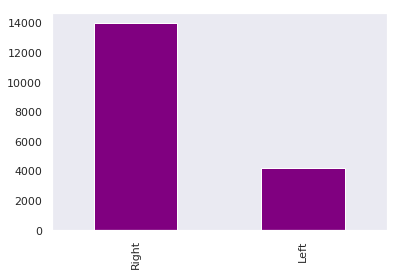

In [28]:
data['Preferred Foot'].value_counts().plot.bar(color = 'purple')

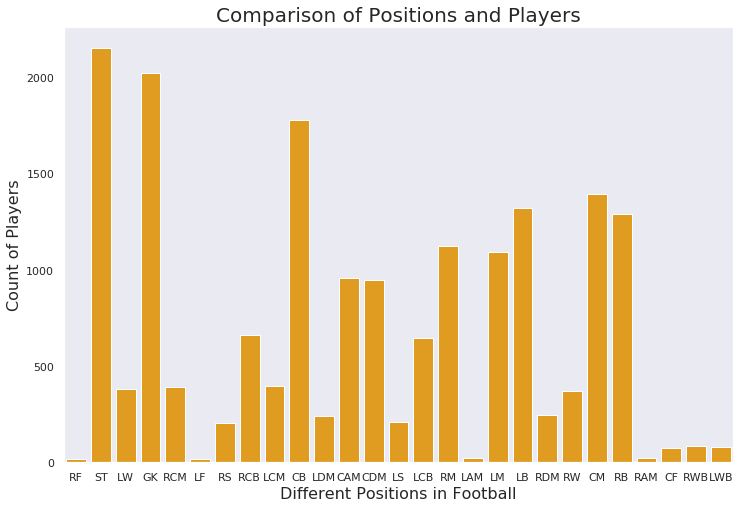

In [17]:
# different positions acquired by the players 

plt.figure(figsize = (12, 8))
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
ax = sns.countplot('Position', data = fifa_data, color = 'orange')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 158023 to 246269
Data columns (total 88 columns):
Unnamed: 0                  18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non